# Exploratory Analysis

In [1]:
#Import libraries

import pandas as pd
from constants import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from pandas import Series
from sklearn.preprocessing import MinMaxScaler

In [2]:
#Functions to read data

#Read values for each parameter
def read_values(index, list):
    list_values = []
    for l in list:
        list_values.append(df_main.iloc[index][l])
    return list_values

#Plot histogram for given list
def plot_histogram(list, bins, xlabel, ylabel, title,i):
    plt.hist(list, bins=bins, facecolor='red')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.savefig('/Users/akankshitadash/Desktop/'+str(i)+'TE')
    plt.show()
    
#Check if sequence is increasing  
def monotonic_increase(x):
    dx = np.diff(x)
    return np.all(dx >= 0)

#Check if sequence is decreasing  
def monotonic_decrease(x):
    dx = np.diff(x)
    return np.all(dx <= 0)

#Check if sequence is increasing then decreasing  
def increase_decrease(x):
    return x[1]>=x[0] and x[2]<=x[1]

#Check if sequence is decreasing then increasing  
def decrease_increase(x):
    return x[1]<=x[0] and x[2]>=x[1]

In [3]:
#Read data
# df_new = pd.read_csv('AdjustedRPKMOutput/merged.txt', sep=",")
df_main = pd.read_csv('Original/RNASeq_chrE.txt', sep="\t")
print("Cleaned dataset size is",len(df_main))

Cleaned dataset size is 12429


In [4]:
df_main.keys()

Index(['AccNum', 'GeneName', 'cdReads0', 'cdRPKM0', 'cdReads1', 'cdRPKM1',
       'cdReads2', 'cdRPKM2', 'cdReads3', 'cdRPKM3', 'cdReads4', 'cdRPKM4'],
      dtype='object')

In [5]:
df_new = df_new[['AccNum','GeneName','cdReads0','cdRPKM0','cdReads1','cdRPKM1','cdReads2','cdRPKM2']]
df_main.head(5)

NameError: name 'df_new' is not defined

In [32]:
#Descriptive statistics

print(df_main.dtypes)
print(df_main.describe())

AccNum       object
GeneName     object
cdReads0    float64
cdRPKM0     float64
cdReads1    float64
cdRPKM1     float64
cdReads2    float64
cdRPKM2     float64
cdReads3    float64
cdRPKM3     float64
cdReads4    float64
cdRPKM4     float64
dtype: object
           cdReads0       cdRPKM0      cdReads1       cdRPKM1      cdReads2  \
count  11745.000000  11745.000000  11745.000000  11745.000000  11745.000000   
mean     274.073052     67.850662    229.540230     69.696305    151.581779   
std      831.559661    274.569200    705.636945    314.290179    477.369326   
min        1.000000      0.015731      1.000000      0.024048      1.000000   
25%       35.000000      5.520751     28.000000      5.403156     20.000000   
50%      101.000000     15.973090     84.000000     15.812829     57.000000   
75%      252.000000     47.621552    211.000000     46.884439    139.000000   
max    44772.000000  10886.323745  34786.000000  11148.481000  18807.000000   

            cdRPKM2      cdReads3 

In [8]:
#Correlation Matrix
print(df_main.corr(method='pearson'))

          cdReads0   cdRPKM0  cdReads1   cdRPKM1  cdReads2   cdRPKM2  \
cdReads0  1.000000  0.648158  0.994607  0.617597  0.964542  0.583598   
cdRPKM0   0.648158  1.000000  0.674016  0.991690  0.722262  0.976923   
cdReads1  0.994607  0.674016  1.000000  0.652978  0.977698  0.622201   
cdRPKM1   0.617597  0.991690  0.652978  1.000000  0.705415  0.992268   
cdReads2  0.964542  0.722262  0.977698  0.705415  1.000000  0.689118   
cdRPKM2   0.583598  0.976923  0.622201  0.992268  0.689118  1.000000   
cdReads3  0.959693  0.704939  0.974260  0.692165  0.994983  0.677947   
cdRPKM3   0.574368  0.961246  0.615491  0.983419  0.683319  0.995677   
cdReads4  0.982658  0.624131  0.987977  0.603030  0.976227  0.580113   
cdRPKM4   0.633641  0.975250  0.667996  0.984797  0.728534  0.989399   

          cdReads3   cdRPKM3  cdReads4   cdRPKM4  
cdReads0  0.959693  0.574368  0.982658  0.633641  
cdRPKM0   0.704939  0.961246  0.624131  0.975250  
cdReads1  0.974260  0.615491  0.987977  0.667996  
cdR

In [9]:
#Skew
print(df_main.skew())

cdReads0    21.958793
cdRPKM0     14.307276
cdReads1    20.244865
cdRPKM1     15.832273
cdReads2    16.369747
cdRPKM2     17.669132
cdReads3    16.299754
cdRPKM3     18.386165
cdReads4    20.218045
cdRPKM4     15.299523
dtype: float64


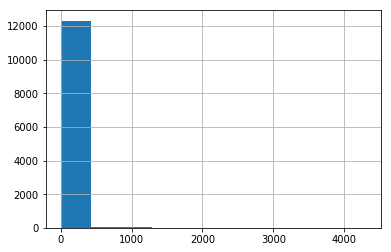

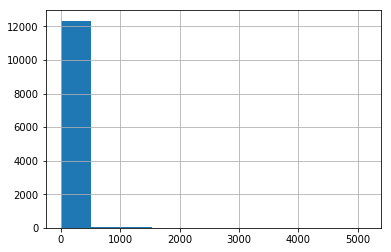

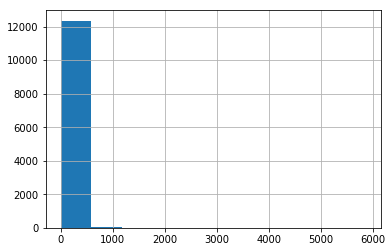

In [10]:
df_main['cdRPKM0'].hist()
plt.show()

df_main['cdRPKM1'].hist()
plt.show()

df_main['cdRPKM2'].hist()
plt.show()

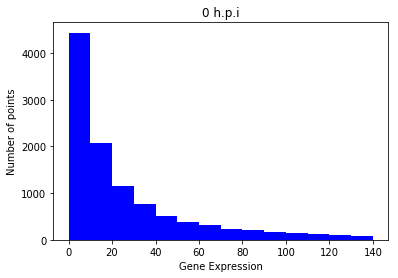

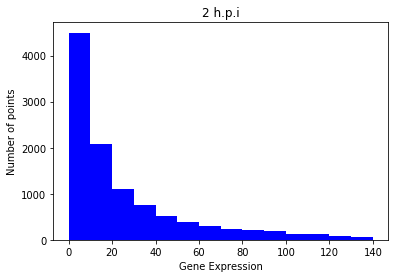

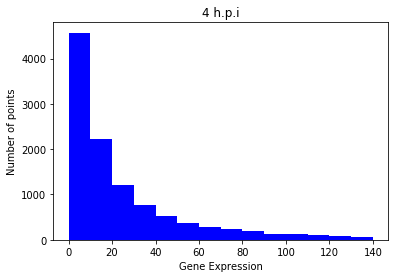

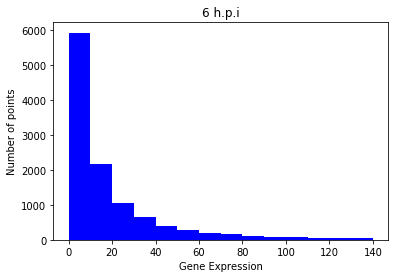

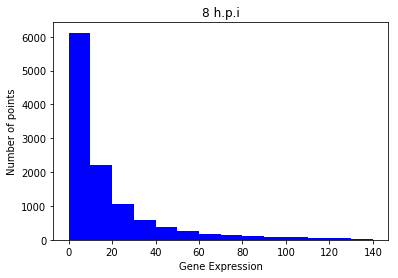

In [34]:
#Histogram of each timepoint with custom bins
TIMEPOINTS = [0,1,2,3,4]
bins = range(0,150,10)
xlabel = 'Gene Expression'
ylabel = 'Number of points'
title = ''
for i in TIMEPOINTS:
    plot_histogram(df_main['cdRPKM'+str(i)],bins,xlabel,ylabel,title+str(2*i)+" h.p.i",i)

3.6071596434201925 12.070054320385328 -6.368929088764835


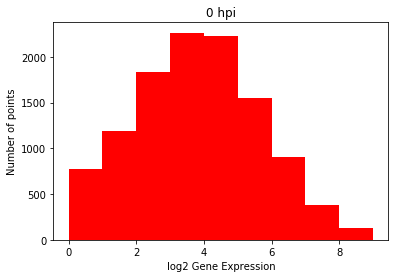

3.555757565278004 12.32459746390244 -6.951792371929031


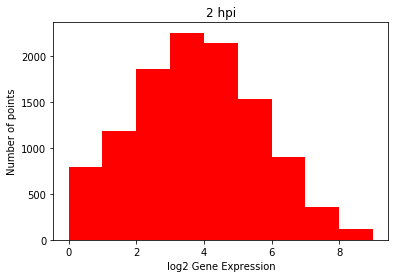

3.322813292451868 12.515102506706086 -5.904236305192919


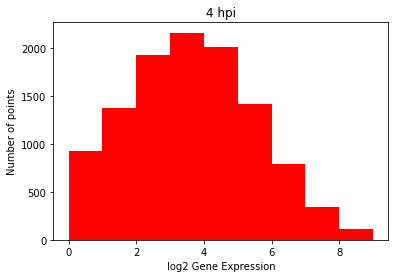

2.5454187962325765 11.748668545802062 -6.866132931489769


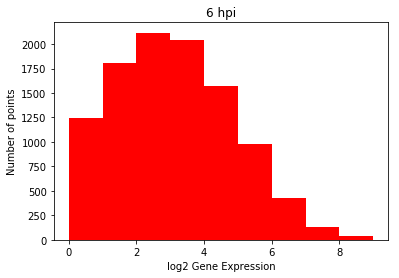

2.169176311171448 10.701466154886031 -7.384693191969981


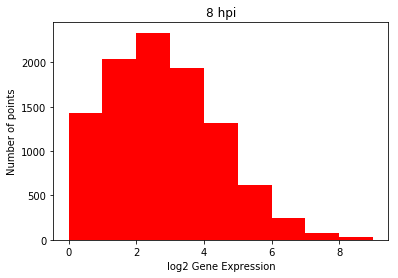

In [61]:
#Histogram of each timepoint with log probabilties with custom bins

bins = np.arange(0,10,1)
xlabel = 'log2 Gene Expression'
ylabel = 'Number of points'
for i in TIMEPOINTS:
    print(np.median(np.log2(df_main['cdRPKM'+str(i)])),np.max(np.log2(df_main['cdRPKM'+str(i)])),np.min(np.log2(df_main['cdRPKM'+str(i)])))
    plot_histogram(np.log2(df_main['cdRPKM'+str(i)]),bins,xlabel,ylabel,str(2*i)+' hpi',i)

In [ ]:
# Plot each parameter from graph
for i, var_plot in enumerate(PLOT):
    var_plot_list = PLOT_LIST[i]
    fig = plt.subplot(111)
    for j in range(len(df_main)): 
        expression_values = read_values(j, var_plot_list)
        fig.plot(var_plot_list, expression_values)
    plt.title(var_plot)
    plt.show()

In [ ]:
# Do log plot
for i, var_plot in enumerate(PLOT):
    var_plot_list = PLOT_LIST[i]
    fig = plt.subplot(111)
    for j in range(len(df_main)): 
        expression_values = read_values(j, var_plot_list)
        fig.plot(var_plot_list, np.log2(expression_values))
    plt.title(var_plot)
    plt.show()

In [ ]:
# Plot values increasing across time points

count=0
for i, var_plot in enumerate(PLOT):
    var_plot_list = PLOT_LIST[i]
    fig = plt.subplot(111)
    for j in range(len(df_main)): 
        expression_values = read_values(j, var_plot_list)
        if(monotonic_increase(expression_values)):
            fig.plot(var_plot_list, expression_values)
            count+=1
    plt.title(var_plot)
    plt.show()
print("Number of increasing sequences are", count, "out of", len(df_main))

In [ ]:
# Plot values increasing across time points log

count=0
for i, var_plot in enumerate(PLOT):
    var_plot_list = PLOT_LIST[i]
    fig = plt.subplot(111)
    for j in range(len(df_main)): 
        expression_values = read_values(j, var_plot_list)
        if(monotonic_increase(expression_values)):
            fig.plot(var_plot_list, np.log2(expression_values))
            count+=1
    plt.title(var_plot)
    plt.show()
print("Number of increasing sequences are", count, "out of", len(df_main))

In [ ]:
# Plot values decreasing across time points

count=0
for i, var_plot in enumerate(PLOT):
    var_plot_list = PLOT_LIST[i]
    fig = plt.subplot(111)
    for j in range(len(df_main)): 
        expression_values = read_values(j, var_plot_list)
        if(monotonic_decrease(expression_values)):
            fig.plot(var_plot_list, expression_values)
            count+=1
    plt.title(var_plot)
    plt.show()
print("Number of decreasing sequences are", count,"out of", len(df_main))

In [ ]:
# Plot values decreasing across time points log

count=0
for i, var_plot in enumerate(PLOT):
    var_plot_list = PLOT_LIST[i]
    fig = plt.subplot(111)
    for j in range(len(df_main)): 
        expression_values = read_values(j, var_plot_list)
        if(monotonic_decrease(expression_values)):
            fig.plot(var_plot_list, np.log2(expression_values))
            count+=1
    plt.title(var_plot)
    plt.show()
print("Number of decreasing sequences are", count,"out of", len(df_main))

In [ ]:
# Plot values increasing, then decreasing across time points

count=0
for i, var_plot in enumerate(PLOT):
    var_plot_list = PLOT_LIST[i]
    fig = plt.subplot(111)
    for j in range(len(df_main)): 
        expression_values = read_values(j, var_plot_list)
        if(increase_decrease(expression_values)):
            fig.plot(var_plot_list, expression_values)
            count+=1
    plt.title(var_plot)
    plt.show()
print("Number of increase/decrease sequences are", count, "out of", len(df_main))

In [ ]:
# Plot values increasing, then decreasing across time points log

count=0
for i, var_plot in enumerate(PLOT):
    var_plot_list = PLOT_LIST[i]
    fig = plt.subplot(111)
    for j in range(len(df_main)): 
        expression_values = read_values(j, var_plot_list)
        if(increase_decrease(expression_values)):
            fig.plot(var_plot_list, np.log2(expression_values))
            count+=1
    plt.title(var_plot)
    plt.show()
print("Number of increase/decrease sequences are", count, "out of", len(df_main))

In [ ]:
# Plot values decreasing, then increasing across time points

count=0
for i, var_plot in enumerate(PLOT):
    var_plot_list = PLOT_LIST[i]
    fig = plt.subplot(111)
    for j in range(len(df_main)): 
        expression_values = read_values(j, var_plot_list)
        if(decrease_increase(expression_values)):
            fig.plot(var_plot_list, expression_values)
            count+=1
    plt.title(var_plot)
    plt.show()
print("Number of decrease/increase sequences are", count, "out of", len(df_main))

In [ ]:
# Plot values decreasing, then increasing across time points log

count=0
for i, var_plot in enumerate(PLOT):
    var_plot_list = PLOT_LIST[i]
    fig = plt.subplot(111)
    for j in range(len(df_main)): 
        expression_values = read_values(j, var_plot_list)
        if(decrease_increase(expression_values)):
            fig.plot(var_plot_list, np.log2(expression_values))
            count+=1
    plt.title(var_plot)
    plt.show()
print("Number of decrease/increase sequences are", count, "out of", len(df_main))